In [1]:
!pip install tensorflow keras opencv-python matplotlib

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 4.5 MB/s eta 0:00:09
   ---------------------------------------- 0.4/38.8 MB 7.4 MB/s eta 0:00:06
    --------------------------------------- 0.7/38.8 MB 7.8 MB/s eta 0:00:05
   - -------------------------------------- 1.0/38.8 MB 7.3 MB/s eta 0:00:06
   - -------------------------------------- 1.1/38.8 MB 6.4 MB/s eta 0:00:06
   - -------------------------------------- 1.2/38.8 MB 5.2 MB/s eta 0:00:08
   - -------------------------------------- 1.6/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.9/38.8 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.3/38.8 MB 6.7 MB/s eta 0:00:06
   -- ------------------------------------- 2.8/38.8 MB 6.9 MB/s eta 0:00:06
   --- ------------------------------------ 3.2/38.8 MB 7.0 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.8 MB 7.4 MB/s eta 0:00:05
   ---

In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def preprocess_image(image_path, target_size=(128, 128)):
    """Load and preprocess a single image."""
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = image / 255.0  # Normalize
    return image

def load_data(image_dir, target_size=(128, 128), label_map={'real': 0, 'fake': 1}):
    """Load and preprocess images from a directory and assign labels."""
    images = []
    labels = []
    
    for label_name in label_map.keys():
        class_dir = os.path.join(image_dir, label_name)
        label = label_map[label_name]
        
        for image_filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_filename)
            image = preprocess_image(image_path, target_size)
            images.append(image)
            labels.append(label)
    
    return np.array(images), np.array(labels)

# Load the training data (both real and fake)
train_dir = r'C:\Users\202001342\Downloads\archive (2)\DFDC\train'
X_train, y_train = load_data(train_dir)

# Split training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Load the testing data (only fake images)
test_dir = r'C:\Users\202001342\Downloads\archive (2)\DFDC\test'
X_test_fake, _ = load_data(test_dir, label_map={'fake': 1})  # All images labeled as fake

In [8]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def build_model(input_shape=(128, 128, 3)):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (real or fake)
    
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = build_model(input_shape=(128, 128, 3))
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ ?                           │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.7140 - loss: 0.5924 - val_accuracy: 0.7969 - val_loss: 0.5959
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8262 - loss: 0.3811 - val_accuracy: 0.8000 - val_loss: 0.5469
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8267 - loss: 0.3748 - val_accuracy: 0.8125 - val_loss: 0.5262
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8526 - loss: 0.3155 - val_accuracy: 0.8000 - val_loss: 0.5128
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8714 - loss: 0.2927 - val_accuracy: 0.8094 - val_loss: 0.4906
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8433 - loss: 0.3112 - val_accuracy: 0.8188 - val_loss: 0.5011
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8455 - loss: 0.2866 - val_accuracy: 0.7937 - val_loss: 0.6217
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.8824 - loss: 0.2527 - val_accuracy: 0.7969 - val_loss

In [10]:
# Evaluate model on fake testing data
test_predictions = model.predict(X_test_fake)

# Since all images in the test set are fake, predictions should be close to 1
predicted_classes = (test_predictions >= 0.5).astype(int)

# Check how many were correctly classified as fake
num_correct = np.sum(predicted_classes == 1)
accuracy = num_correct / len(predicted_classes)

print(f"Model correctly classified {num_correct}/{len(predicted_classes)} fake images.")
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 346ms/step
Model correctly classified 1486/1600 fake images.
Testing Accuracy: 92.88%


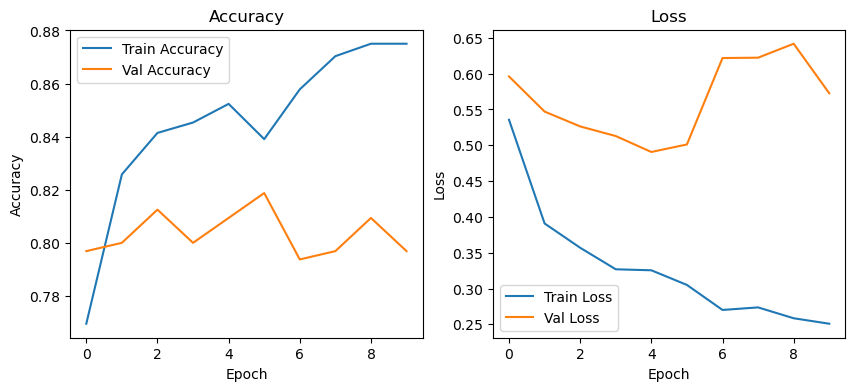

In [11]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(10, 4))
    
    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot training history
plot_history(history)

In [15]:
model.save('deepfake_detector_model.keras')